In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import powerlaw

In [6]:
def datapdf(data, xmin=None):
    # Code adapted from powerlaw package:
    # https://github.com/jeffalstott/powerlaw/blob/master/powerlaw.py
    data = np.asarray(data)
    xmax = np.max(data)
    if not xmin:
        xmin = np.min(data)

    if xmin<1:  
        xmax2=xmax/xmin
        xmin2=1
    else:
        xmax2=xmax
        xmin2=xmin

    log_min_size = np.log10(xmin2)
    log_max_size = np.log10(xmax2)
    number_of_bins = int(np.ceil((log_max_size-log_min_size)*10))
    bins=np.unique(
            np.floor(
                np.logspace(
                    log_min_size, log_max_size, num=number_of_bins)))

    if xmin<1: #Needed to include also data x<1 in pdf.
        hist, edges = np.histogram(data/xmin, bins, density=True)
        edges=edges*xmin # transform result back to original
        hist=hist/xmin # rescale hist, so that np.sum(hist*edges)==1
    else:
        hist, edges = np.histogram(data, bins, density=True)
        
    bin_centers = (edges[1:]+edges[:-1])/2.0
    return bin_centers, hist

# Data analysis C++ files output

## Weight distributions

In [7]:
df=pd.read_csv('weights1000sim0.csv',header=None,names=['Source','Target','weight'])
weights1=df['weight'].values
for k in range(1,10):
    df = pd.read_csv('weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights1 = np.concatenate([weights1, df['weight'].values])

In [179]:
df=pd.read_csv('weights1000sim10.csv',header=None,names=['Source','Target','weight'])
weights2=df['weight'].values
for k in range(11,40):
    df = pd.read_csv('weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights2 = np.concatenate([weights2, df['weight'].values])

In [9]:
df=pd.read_csv('weights1000sim40.csv',header=None,names=['Source','Target','weight'])
weights3=df['weight'].values
for k in range(41,70):
    df = pd.read_csv('Cpp/weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights3 = np.concatenate([weights3, df['weight'].values])

In [10]:
bin_centers1, hist1 = datapdf(weights1)
bin_centers2, hist2 = datapdf(weights2)

In [180]:
bin_centers2, hist2 = datapdf(weights2)

In [11]:
bin_centers3, hist3 = datapdf(weights3)

In [ ]:
w=np.arange(10,max(weights2)-100)
f=5*w**(-2.5)

In [12]:
hist3[np.where(hist3==0)[0]]=np.nan

In [37]:
fit1 = powerlaw.Fit(weights1,min(weights1))

Calculating best minimal value for power law fit
/opt/anaconda3/envs/phdenv/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/opt/anaconda3/envs/phdenv/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


In [183]:
fit2 = powerlaw.Fit(weights2)
print("Powerlaw exponent MLE:",fit2.power_law.alpha)

Calculating best minimal value for power law fit
/opt/anaconda3/envs/phdenv/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


Powerlaw exponent MLE: 2.545384352419836


In [184]:
# Create powerlaw fit over proper range
C = (fit2.power_law.alpha - 1) * fit2.power_law.xmin**(fit2.power_law.alpha - 1)
w = np.arange(fit2.power_law.xmin, max(weights2))
f = C * w**(-fit2.power_law.alpha)
scaling = len(weights2[weights2 > fit2.power_law.xmin]) / len(weights2)
f*=scaling

In [16]:
a = min(weights1)
w1 = np.arange(a, max(weights1) + 2, 0.1)

In [39]:
lambda_exp = fit1.exponential.Lambda

In [41]:
# Exponential
exp = lambda_exp * np.exp(-lambda_exp * (w1 - a))

In [185]:
df=pd.read_csv('lambda10/weights1000sim10.csv',header=None,names=['Source','Target','weight'])
weights2_1=df['weight'].values
for k in range(11,40):
    df = pd.read_csv('lambda10/weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights2_1 = np.concatenate([weights2_1, df['weight'].values])

In [186]:
df=pd.read_csv('lambda20/weights1000sim10.csv',header=None,names=['Source','Target','weight'])
weights2_2=df['weight'].values
for k in range(11,40):
    df = pd.read_csv('lambda20/weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights2_2 = np.concatenate([weights2_2, df['weight'].values])

In [187]:
df=pd.read_csv('lambda50/weights1000sim10.csv',header=None,names=['Source','Target','weight'])
weights2_5=df['weight'].values
for k in range(11,40):
    df = pd.read_csv('lambda50/weights1000sim' + str(k) + '.csv',\
                     header=None,names=['Source','Target','weight'])
    weights2_5 = np.concatenate([weights2_5, df['weight'].values])

In [188]:
bin_centers2_1, hist2_1 = datapdf(weights2_1)
bin_centers2_2, hist2_2 = datapdf(weights2_2)
bin_centers2_5, hist2_5 = datapdf(weights2_5)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


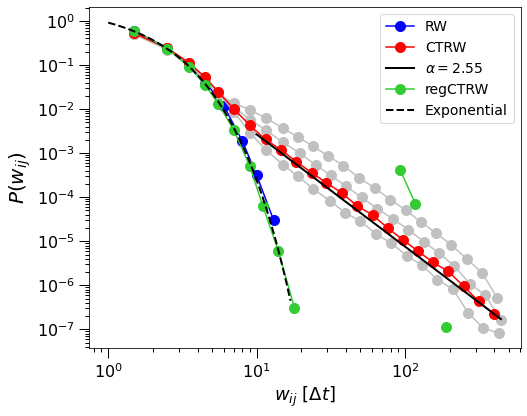

In [191]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.15,top=0.95,bottom=0.16)

plt.loglog(bin_centers1, hist1, color='b', marker='o', markersize=10, label='RW')
#plt.loglog(bin_centers, hist, 'b', linewidth=1)

plt.loglog(bin_centers2_1, hist2_1, color='silver', marker='o', markersize=10)
plt.loglog(bin_centers2_2, hist2_2, color='silver', marker='o', markersize=10)
plt.loglog(bin_centers2_5, hist2_5, color='silver', marker='o', markersize=10)

plt.loglog(bin_centers2, hist2, color='r', marker='o', markersize=10, label='CTRW')
#plt.loglog(bin_centers1, hist1, 'r', linewidth=1)

plt.loglog(w, f, 'grey', color='k', linestyle='-', linewidth=2, label=r'$\alpha=$' +\
                       str(round(fit2.power_law.alpha,2)))

plt.loglog(bin_centers3, hist3, color='limegreen', marker='o', markersize=10, label='regCTRW')

plt.loglog(w1, exp, color='k', linewidth=2, linestyle='dashed', label='Exponential')  

plt.xlabel(r'$w_{ij}$' + r' $[\Delta t]$', fontsize=18)
plt.ylabel(r'$P(w_{ij})$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')

plt.legend(loc=1,fontsize = 14)

#plt.savefig('Figure06(new).eps')

plt.show()

# SE models on RWs

## Continuous-time RWs

In [48]:
T = 500

In [151]:
I=np.zeros(T)
I1=np.zeros(T)

for k in range(30):
    I += np.genfromtxt('rwexposed' + str(k) + '.txt')
for k in range(30,60):
    I1 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I/=30
I1/=30

In [152]:
I2=np.zeros(T)
for k in range(60,90):
    I2 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I2/=30

In [153]:
I3=np.zeros(T)
for k in range(90,120):
    I3 += np.genfromtxt('rwexposed' + str(k) + '.txt')
I3/=30

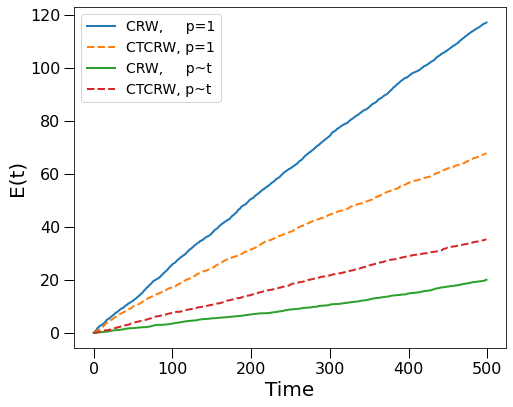

In [154]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.15,top=0.95,bottom=0.16)

plt.plot(I, linewidth=2, label='CRW,     p=1')
plt.plot(I1, linewidth=2, linestyle='--', label='CTCRW, p=1')
plt.plot(I2, linewidth=2, label='CRW,     p~t')
plt.plot(I3, linewidth=2, linestyle='--', label='CTCRW, p~t')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')

plt.xlabel('Time', fontsize=20)
plt.ylabel('E(t)', fontsize=20)

plt.legend(loc=2,fontsize = 14)


#plt.savefig('simulation-spreadingcurves-RWs-20211112.png')

plt.show()

## SE model mu sweep

In [58]:
mu = np.linspace(0.01,0.39,20)

In [59]:
E_CRW = [[] for i in range(20)]

for i in range(20):
    for j in range(30):
        k = i * 30 + j
        E_CRW[i].append(np.genfromtxt('rwexposed_sweep' + str(k) + '.txt')[-1])

In [60]:
for i in range(len(E_CRW)):
    E_CRW[i] = np.mean(E_CRW[i])

In [69]:
E_CTCRW = [[] for i in range(20)]

for i in range(20):
    for j in range(30):
        k = 600 + i * 30 + j
        E_CTCRW[i].append(np.genfromtxt('rwexposed_sweep' + str(k) + '.txt')[-1])

In [70]:
for i in range(len(E_CTCRW)):
    E_CTCRW[i] = np.mean(E_CTCRW[i])

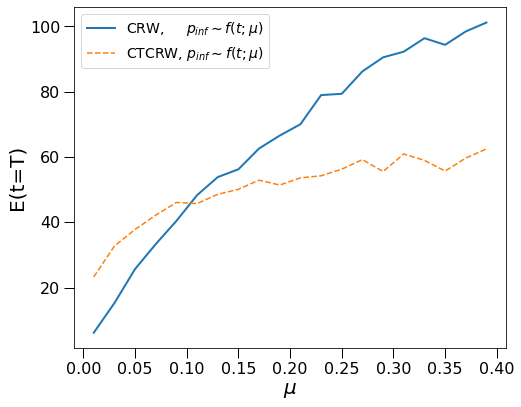

In [71]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=0.15,top=0.95,bottom=0.16)

plt.plot(mu, E_CRW, linewidth=2, label='CRW,     ' + r'$p_{inf}\sim f(t;\mu)$')
plt.plot(mu, E_CTCRW, linestyle='--', label='CTCRW, ' + r'$p_{inf}\sim f(t;\mu)$')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel('E(t=T)', fontsize=20)

plt.legend(loc=2,fontsize = 14)

#plt.savefig('simulation-RWs-mu-sweep-20220528.png')

plt.show()

## Regulated RWs

In [80]:
Ir=np.zeros(T)
I1r=np.zeros(T)

for k in range(120,150):
    Ir += np.genfromtxt('rwexposed' + str(k) + '.txt')
for k in range(150,180):
    I1r += np.genfromtxt('rwexposed' + str(k) + '.txt')
Ir/=30
I1r/=30

I2r=np.zeros(T)
for k in range(180,210):
    I2r += np.genfromtxt('rwexposed' + str(k) + '.txt')
I2r/=30

I3r=np.zeros(T)
for k in range(210,240):
    I3r += np.genfromtxt('rwexposed' + str(k) + '.txt')
I3r/=30

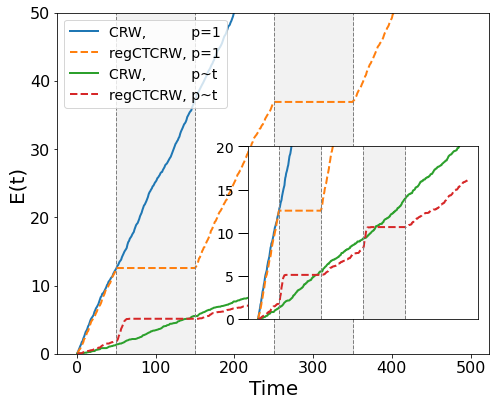

In [81]:
fig, ax1 = plt.subplots(figsize=(8,6))
plt.subplots_adjust(left=0.15,top=0.95,bottom=0.16)

left, bottom, width, height = [0.48, 0.24, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

s=14

## -------------------------------------------------------------------------
ax1.plot(Ir, linewidth=2,                  label='CRW,          p=1')
ax1.plot(I1r, linewidth=2, linestyle='--', label='regCTCRW, p=1')
ax1.plot(I2r, linewidth=2,                 label='CRW,          p~t')
ax1.plot(I3r, linewidth=2, linestyle='--', label='regCTCRW, p~t')

ax1.axvspan(50,150, alpha=0.1, color='grey')
ax1.axvspan(250,350, alpha=0.1, color='grey')
ax1.axvline(50, color='grey', linestyle='--',linewidth=1)
ax1.axvline(150, color='grey', linestyle='--',linewidth=1)
ax1.axvline(250, color='grey', linestyle='--',linewidth=1)
ax1.axvline(350, color='grey', linestyle='--',linewidth=1)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')


ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('E(t)', fontsize=20)
ax1.tick_params(labelsize=16)

ax1.legend(loc=2,fontsize = 14)

ax1.set_ylim([0,50])

## -------------------------------------------------------------------------

ax2.plot(Ir, linewidth=2)
ax2.plot(I1r, linewidth=2, linestyle='--')
ax2.plot(I2r, linewidth=2)
ax2.plot(I3r, linewidth=2, linestyle='--')

ax2.axvspan(50,150, alpha=0.1, color='grey')
ax2.axvspan(250,350, alpha=0.1, color='grey')
ax2.axvline(50, color='grey', linestyle='--',linewidth=1)
ax2.axvline(150, color='grey', linestyle='--',linewidth=1)
ax2.axvline(250, color='grey', linestyle='--',linewidth=1)
ax2.axvline(350, color='grey', linestyle='--',linewidth=1)

#ax2.set_yticklabels([])
#ax2.set_xticklabels([])
#for tick in ax2.yaxis.get_major_ticks():
#    tick.label.set_fontsize(s)
ax2.tick_params(labelsize=14)
ax2.tick_params(
    axis='both',         
    which='both',      
    bottom=False, 
    top=False,        
    left=True,
    labelbottom=False,
    labelleft=True)

ax2.set_ylim([0,20])

'''plt.savefig('simulation-spreadingcurves-RWs-20211112-inset.png')'''

plt.show()

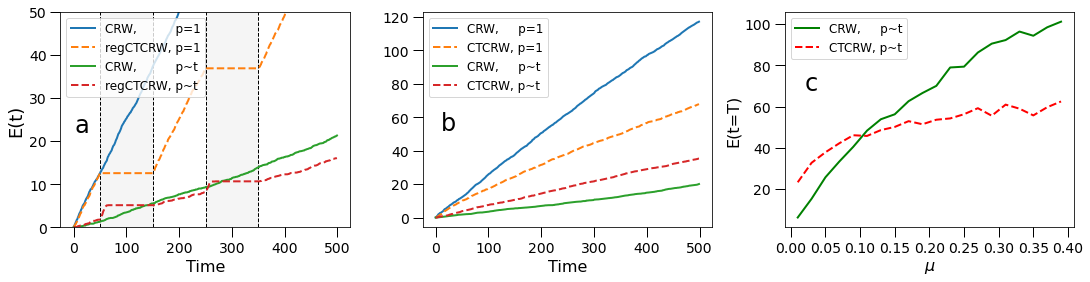

In [177]:
fig = plt.figure(figsize=(17.6,4.4))
grid = plt.GridSpec(1,3, wspace=0.25,left=0.1,bottom=0.2)
# left=0.1, bottom=0.05, right=None, top=0.95, hspace=0.4, wspace=0.4
p0=fig.add_subplot(grid[0,0])

s=14

## -------------------------------------------------------------------------

p0.axvspan(50,150, color='whitesmoke')
p0.axvspan(250,350, color='whitesmoke')
p0.axvline(50, color='k', linestyle='--',linewidth=1)
p0.axvline(150, color='k', linestyle='--',linewidth=1)
p0.axvline(250, color='k', linestyle='--',linewidth=1)
p0.axvline(350, color='k', linestyle='--',linewidth=1)

p0.plot(Ir, linewidth=2,                  label='CRW,          p=1')
p0.plot(I1r, linewidth=2, linestyle='--', label='regCTCRW, p=1')
p0.plot(I2r, linewidth=2,                 label='CRW,          p~t')
p0.plot(I3r, linewidth=2, linestyle='--', label='regCTCRW, p~t')



p0.set_xlabel('Time', fontsize=16)
p0.set_ylabel('E(t)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')
p0.set_ylim([0,50])
p0.text(1, 22, 'a', fontsize=24)
p0.legend(loc=2,fontsize=12)

'''left, bottom, width, height = [0.21, 0.22, 0.11, 0.32]
ax1 = fig.add_axes([left, bottom, width, height])

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.tick_params(
    axis='both',         
    which='both',      
    bottom=False, 
    top=False,        
    left=True,
    labelbottom=False,
    labelleft=False) 
#ax1.patch.set_alpha(0.5)

ax1.axvspan(50,150, alpha=0.1, color='grey')
ax1.axvspan(250,350, alpha=0.1, color='grey')
ax1.axvline(50, color='grey', linestyle='--',linewidth=1)
ax1.axvline(150, color='grey', linestyle='--',linewidth=1)
ax1.axvline(250, color='grey', linestyle='--',linewidth=1)
ax1.axvline(350, color='grey', linestyle='--',linewidth=1)

ax1.plot(Ir, linewidth=1)
ax1.plot(I1r, linewidth=1, linestyle='--')
ax1.plot(I2r, linewidth=1)
ax1.plot(I3r, linewidth=1, linestyle='--')


ax1.set_xlim([0,400])
ax1.set_ylim([0,15])'''


## -------------------------------------------------------------------------

p1=fig.add_subplot(grid[0,1])

p1.plot(I, linewidth=2, label='CRW,     p=1')
p1.plot(I1, linewidth=2, linestyle='--', label='CTCRW, p=1')
p1.plot(I2, linewidth=2, label='CRW,     p~t')
p1.plot(I3, linewidth=2, linestyle='--', label='CTCRW, p~t')

p1.set_xlabel('Time', fontsize=16)
#plt.ylabel(r'$P(t)$', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')
#plt.ylim([10e-9,1])
p1.text(10, 52, 'b', fontsize=24)
plt.legend(loc=2,fontsize=12)

## -------------------------------------------------------------------------

p2=fig.add_subplot(grid[0,2])

p2.plot(mu, E_CRW, linewidth=2, color="green", label='CRW,     p~t')
p2.plot(mu, E_CTCRW, linewidth=2, linestyle='--', color="red", label='CTCRW, p~t')

p2.set_xlabel(r'$\mu$', fontsize=16)
p2.set_ylabel('E(t=T)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(axis='both',length=10,width=1,which='major')
plt.tick_params(axis='both',length=4,width=1,which='minor')

#p2.text(0.02, 90, 'c', fontsize=24)
p2.text(0.02, 68, 'c', fontsize=24) 
plt.legend(loc=2,fontsize=12)

#plt.savefig('Figure07.eps')

plt.show()